<a id="up"></a>

# Description du Notebook
---------------
**Objectif** : Séparer les données de taille en créant des groupes selon des intervalles d'âge.

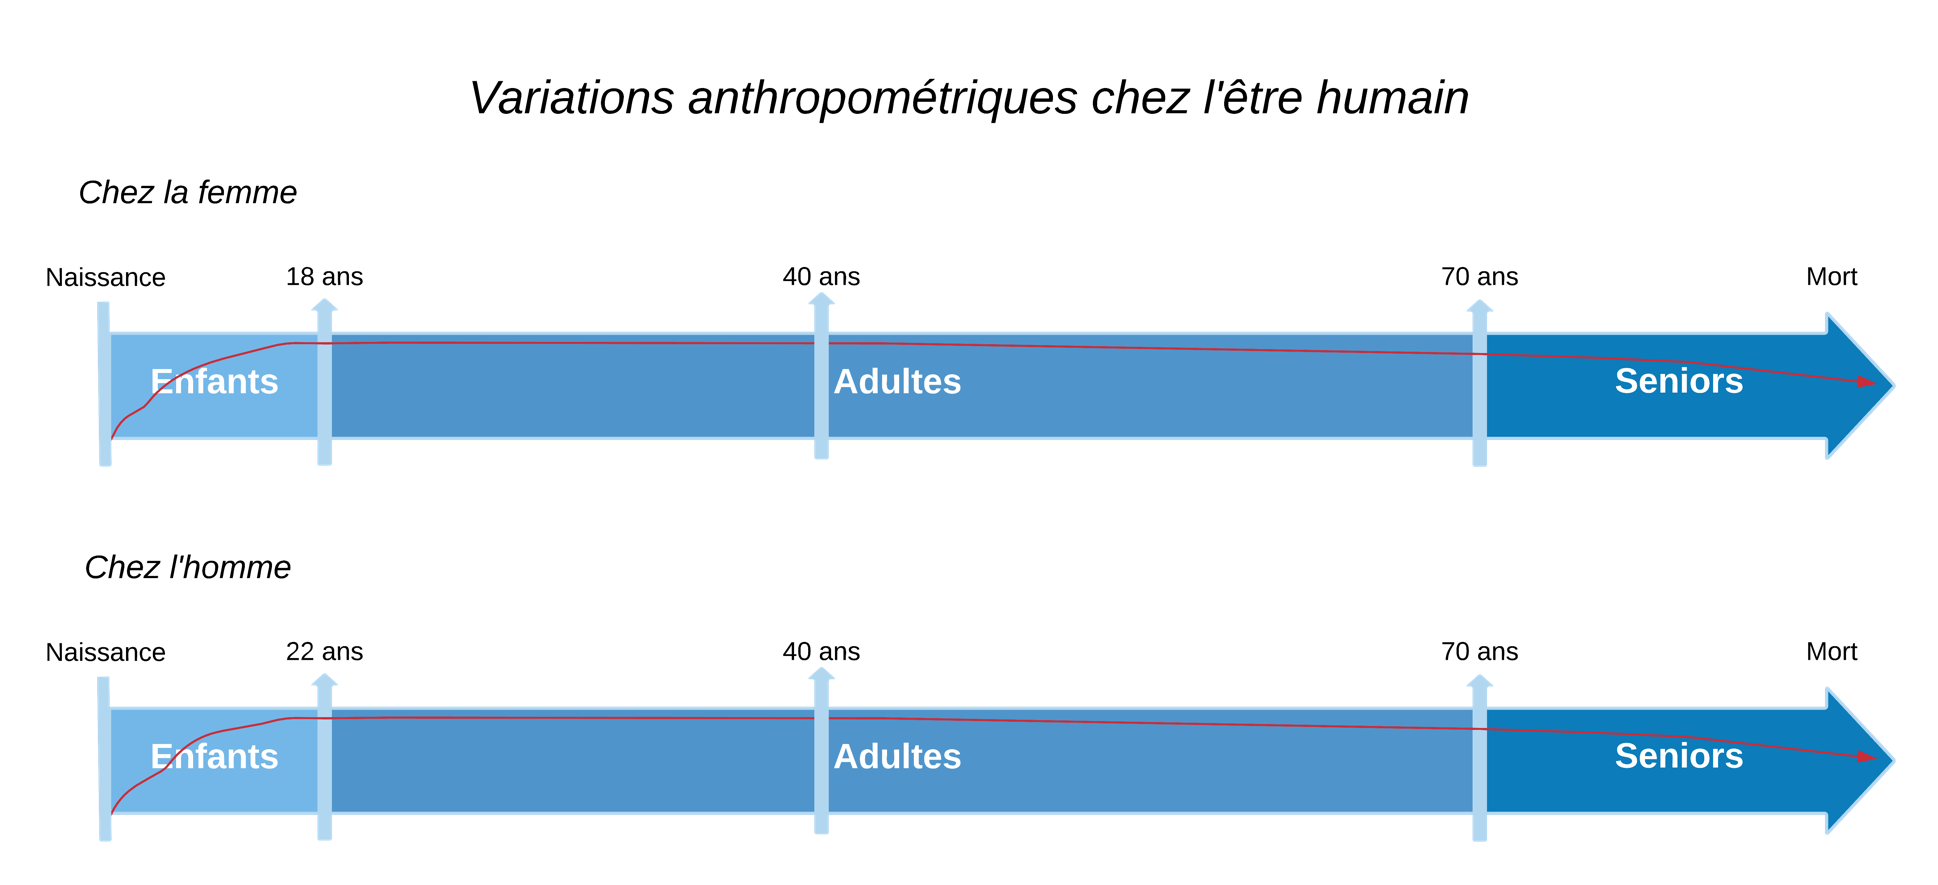

**Visualisation des données** : Boxplots, Kernel Density Estimation plots

## Sommaire [(^)](#up)
-----------
- [Import des données et des packages](#import)
- [Intervalles Âge](#interval-age)
- [Boxplots : Taille du patient ~ Tranche d'Âge](#boxplot)
- [Kernel Density Estimation plots](#kde)
- [KDE : Interprétation des résultats](#kde-interpretation)


<a id="import"></a>

## Import des données et des packages [(^)](#up)
----------

In [17]:
import pandas as pd
import os
import numpy as np
import timeit
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from scipy import stats
import seaborn as sns

start = timeit.default_timer()

# Load data
# LOX-PC : file = os.path.join('C:/Users/LOX/Desktop/CLB/test/Taille', 'mean_std.csv')
# LOX-Mac : file = os.path.join('/Users/loicdancelme/Desktop/Stage_TIS5/test', 'mean_std.csv')
# CLB-PC : 
file = os.path.join('C:/Users/dancel/Desktop/DQA/Projet Centrale/Taille', 'mean_std.csv')
data = pd.read_csv(file, dtype={'Taille' : float, 'Appli_origine' : str, 'mean' : float, 'std' : float, 'sem' : float}, na_values = '')

<a id="interval-age"></a>

## Intervalles Âge [(^)](#up)
-------------

In [18]:
# Taille : m -> cm
data["Taille"] = data["Taille"] *100

# //// Intervalles Age
age20 = list(range(20 *365)) # Croissance ~ de 0 à 20 ans
age20_40 = list(range((20 *365), (40 *365))) # Stagnation de 0 à 40 ans 
age40_70 = list(range((40 *365), (70 *365))) # Diminution taille à partir de 40 ans
age70plus = list(range((70 *365) , (110 *365)))

# //// Separation en groupe selon les intervalles d'age
data20 = data[data['age_at_entry'].isin(age20)]
data20.to_csv("data20.csv", index=False)
data20_40 = data[data['age_at_entry'].isin(age20_40)]
data40_70 = data[data['age_at_entry'].isin(age40_70)]
data70 = data[data['age_at_entry'].isin(age70plus)]

m20, s20 = stats.norm.fit(data20['Taille'])
m20_40, s20_40 = stats.norm.fit(data20_40['Taille'])
m40_70, s40_70 = stats.norm.fit(data40_70['Taille'])
m70, s70 = stats.norm.fit(data70['Taille'])

# //// Groups stats: mean, std
groups_mean = [m20, m20_40, m40_70, m70]
groups_std = [s20, s20_40, s40_70, s70]

Distribution des patients dans les différents groupes

|Période|Intervalle (ans)|Effectif| Moyenne | Ecart-type|
|:-|:-:|:-:|:-:|:-:|
|Enfant / Adolescent|[0-20]|105239|128.51|32.75|
|Jeune Adulte|[20-40]|35848|170.23|9.92|
|Adulte|[40-70]|229963|167.53|8.93|
|Seniors|[70-110]|76693|165.48|9.02|

**Total** : 447 743 lignes.

Quelques *outliers* se remarquent :

In [19]:
# //// Some weird values
data_outliers00 = data[data['age_at_entry'] < 0] # age < 0
data_outliers01 = data[data['Taille'] > 220]     # Taille > 2.5 m


print('Outliers : age < 0, n = 11, 5 premières valeurs :\n')
print(data_outliers00.iloc[:5, [1, 4, -2]])
print('\nOutliers : Taille > 250, n = 13, 5 premières valeurs :\n')
print(data_outliers01.iloc[:5, [1, 4, -2]])

Outliers : age < 0, n = 11, 5 premières valeurs :

        age_at_entry  Taille      mean
33460         -16945   163.0  1.614615
34467         -16191   180.0  1.800000
190905          -177    66.0  1.398636
236976          -366    50.0  0.926222
272814          -109    72.0  1.225244

Outliers : Taille > 250, n = 13, 5 premières valeurs :

        age_at_entry  Taille      mean
45802          24759   250.0  2.500000
134112          9506   240.0  1.566789
188154          2198   870.0  1.720000
190938          5386   490.0  1.398636
245257           670   480.0  0.974255


<a id="boxplot"></a>

## Boxplots : Taille du patient ~ Tranche d'Âge [(^)](#up)
----------------



Text(0.5, 1.0, "Taille du patient ~ Tranche d'Âge")

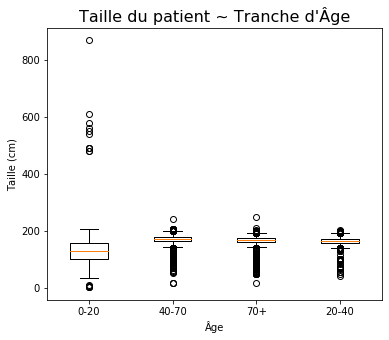

In [20]:
# Data used for the boxplpots
plt.figure(figsize=(6, 5))
data_bxplt = [data20["Taille"], data20_40["Taille"], data40_70["Taille"], data70["Taille"]]
labels={'0-20', '70+', '40-70', '20-40'}

# boxplot w/o ylim (outliers are visible)
plt.boxplot(data_bxplt, labels=labels)
plt.ylabel("Taille (cm)")
plt.xlabel("Âge")
plt.title("Taille du patient ~ Tranche d'Âge", fontsize=16)

On recommence en supprimant les valeurs de taille > 300 cm

Text(0.5, 1.0, 'Boxplot sans les outliers')

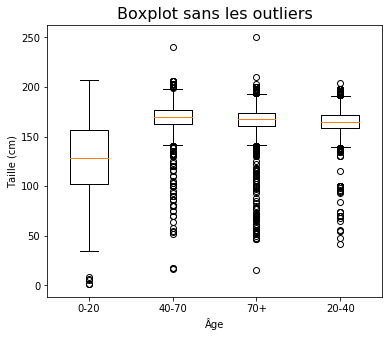

In [21]:
# boxplot w/o outliers
data20 = data20[data20["Taille"] < 300]
data_bxplt = [data20["Taille"], data20_40["Taille"], data40_70["Taille"], data70["Taille"]]
plt.figure(figsize=(6, 5))
plt.boxplot(data_bxplt, labels=labels)
plt.ylabel("Taille (cm)")
plt.xlabel("Âge")
plt.title("Boxplot sans les outliers", fontsize=16)

<a id="kde"></a>

## Kernel Density Estimation plots [(^)](#up)
------------

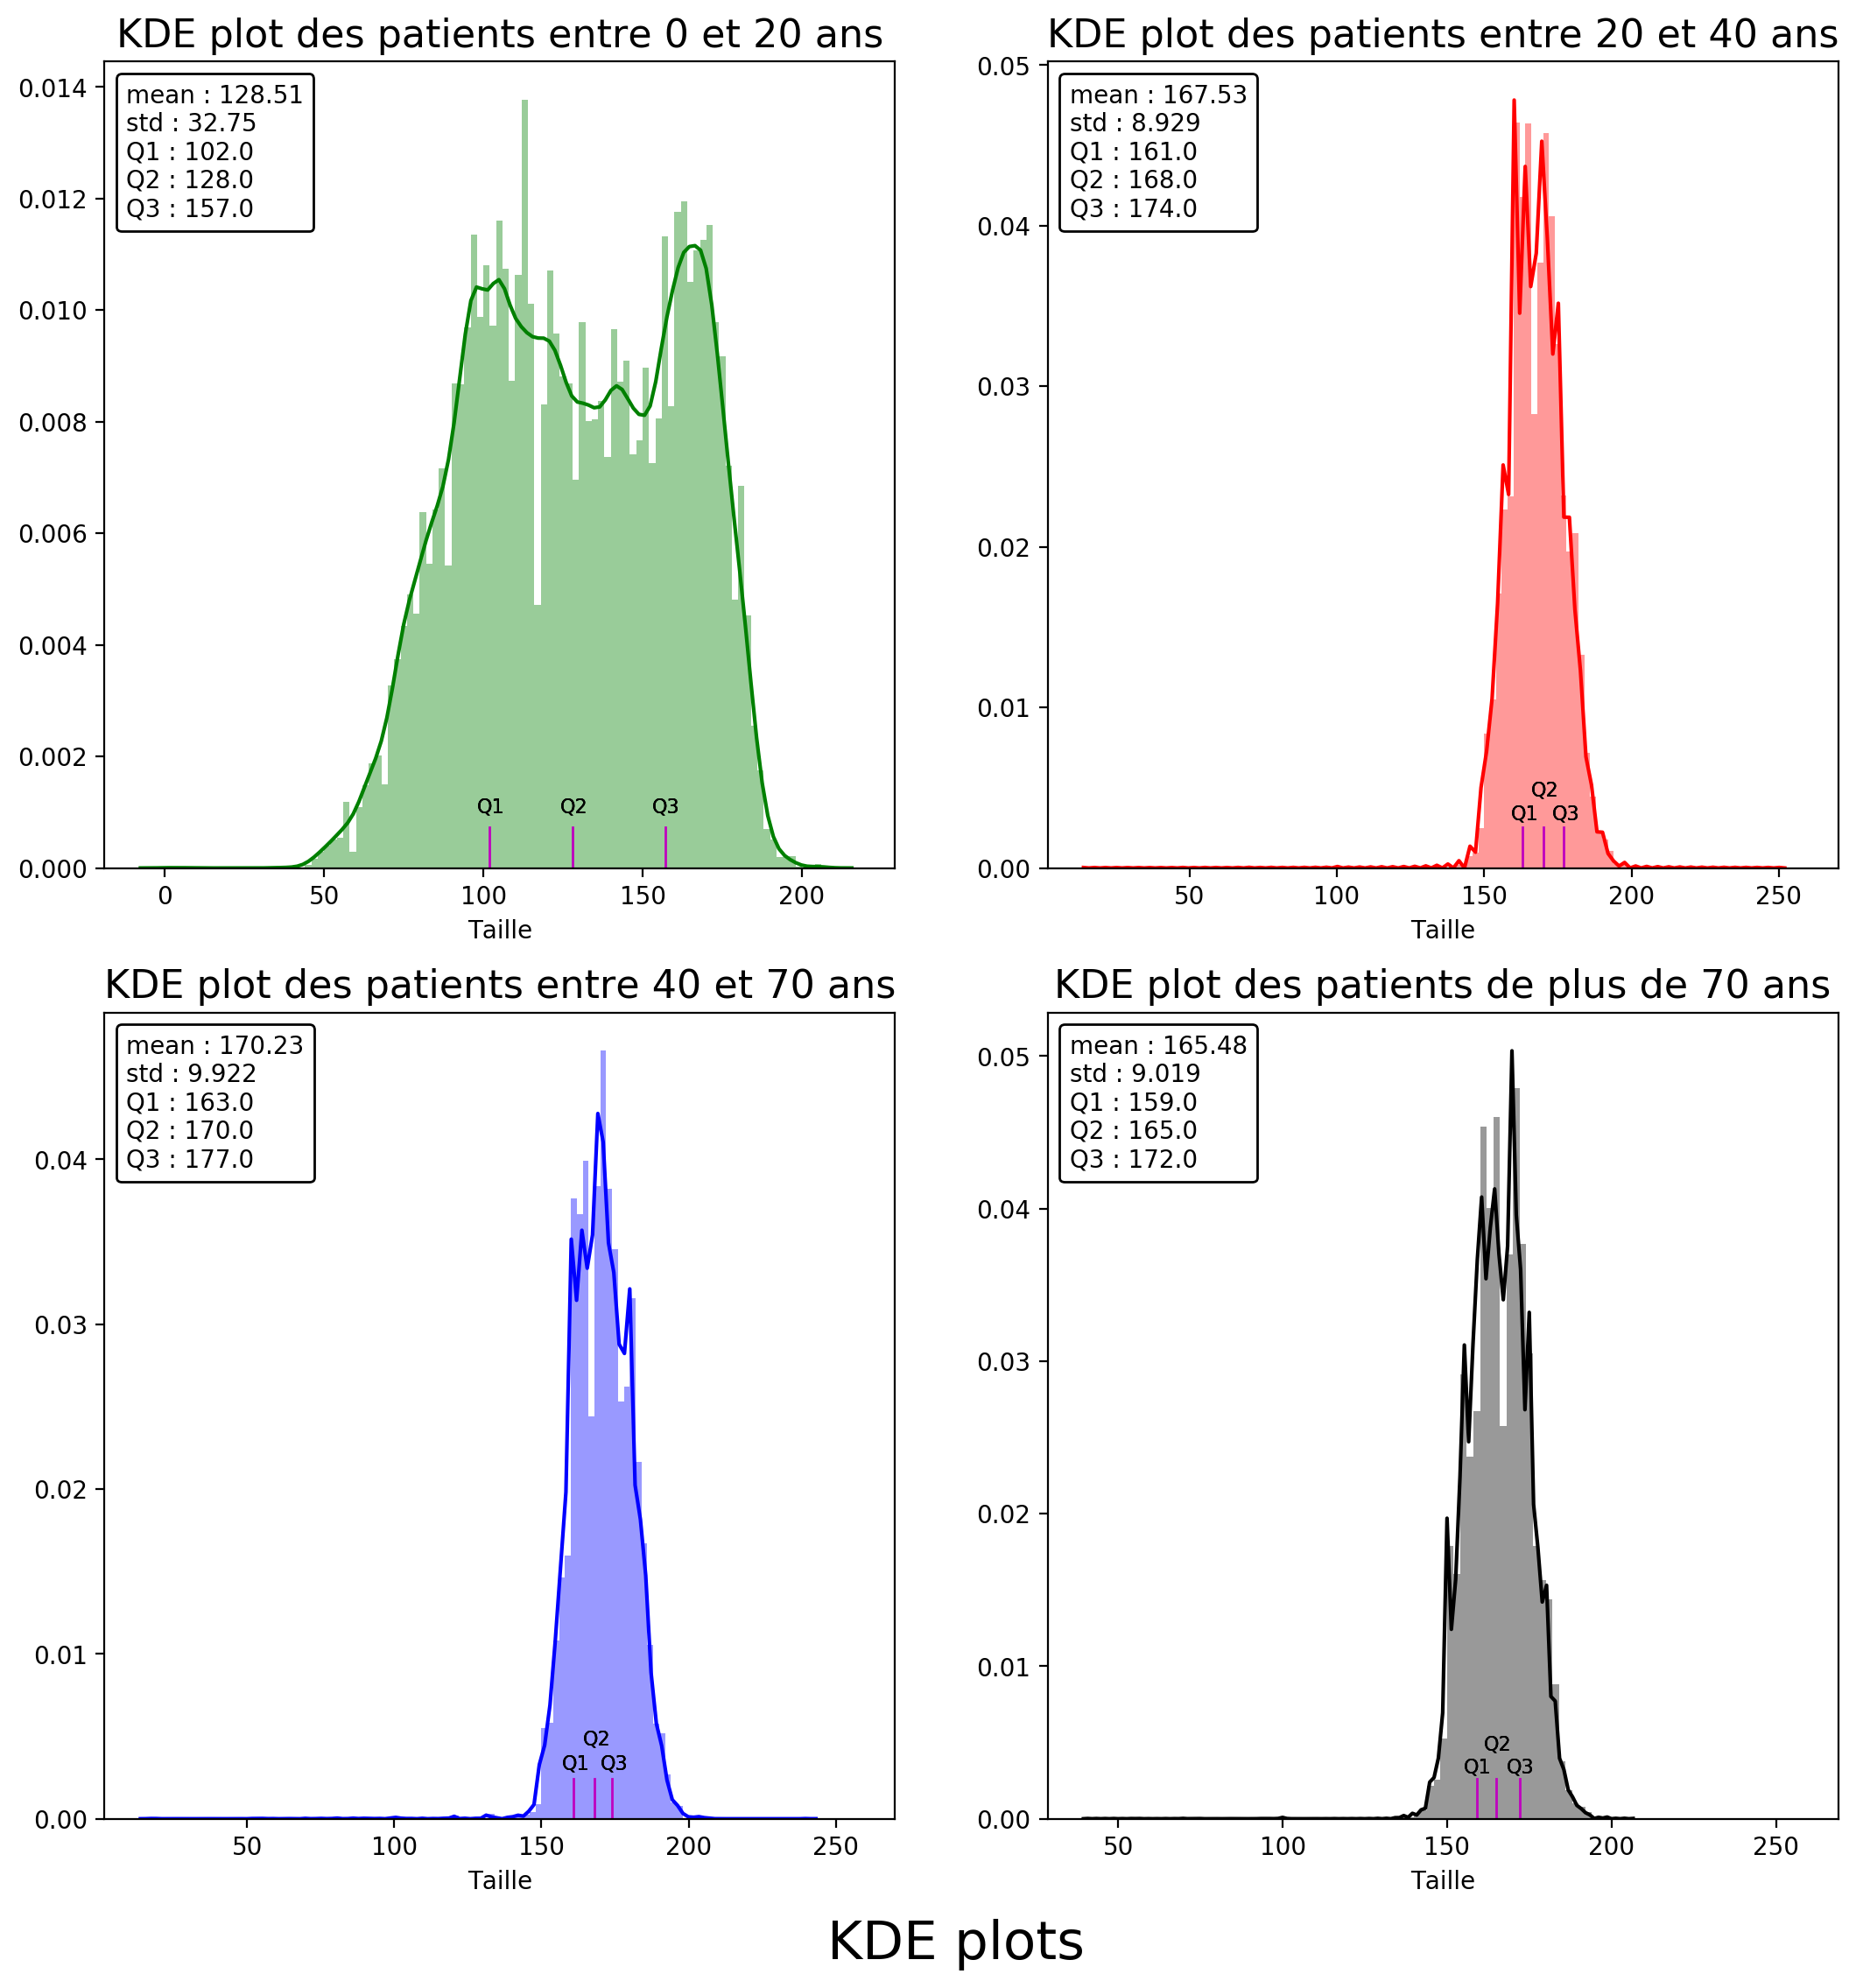

In [31]:
# plot a kernel density estimation over a stacked barchart
fig, axes = plt.subplots(2, 2, figsize=[11, 11], dpi=200)

# Affichage quantiles
iqr20 = stats.mstats.mquantiles(data20['Taille'])
iqr20_40 = stats.mstats.mquantiles(data20_40['Taille'])
iqr40_70 = stats.mstats.mquantiles(data40_70['Taille'])
iqr70 = stats.mstats.mquantiles(data70['Taille'])
iqrs = [iqr20, iqr20_40, iqr40_70, iqr70]

def iqr_plot(iqr, ax, y, y2):
    for xc in iqr:
        ax.axvline(x=xc, ymin= 0, ymax = 0.05, c ='m', linewidth = 1)
    for i in iqr:
        ax.text(iqr[0]-4, y,'Q1', fontsize = 8)
        ax.text(iqr[1]-4, y2,'Q2', fontsize = 8)
        ax.text(iqr[2]-4, y,'Q3', fontsize = 8)

# Labels def
def lbl_box(i):
    lbl = "mean : " + str(round(groups_mean[i],2)) + "\nstd : " + str(round(groups_std[i],3)) + "\nQ1 : "  
    lbl += str(iqrs[i][0]) + "\nQ2 : "  + str(iqrs[i][1]) + "\nQ3 : "  + str(iqrs[i][2])
    return lbl
                                                                      
lbl20 = lbl_box(0)
lbl20_40 = lbl_box(1)
lbl40_70 = lbl_box(2)
lbl70 = lbl_box(3)

# Display mean, std, IQR
def mean_std_box(lbl, x, y):
    at = AnchoredText(lbl,
              prop=dict(size=10), frameon=True,
              loc='upper left',
              )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    axes[x][y].add_artist(at)


# //// [00-20] range Kernel 
sns.distplot(data20['Taille'], bins= np.arange(0,220,2), norm_hist = False, color="g", ax=axes[0, 0], kde_kws={"bw":"silverman"})
iqr_plot(iqr20, axes[0][0], 0.001, 0.001)
axes[0][0].set_title('KDE plot des patients entre 0 et 20 ans', fontsize=16)
mean_std_box(lbl20, 0, 0)

# //// [20-40] range histogram
sns.distplot(data20_40['Taille'], bins= np.arange(70,260,2), color="b", ax=axes[1, 0], kde_kws={"bw":"silverman"})
iqr_plot(iqr20_40, axes[0][1], 0.003, 0.0045)
axes[0][1].set_title('KDE plot des patients entre 20 et 40 ans', fontsize=16)
mean_std_box(lbl20_40, 1, 0)

# //// [40-70] range histogram
sns.distplot(data40_70['Taille'], bins= np.arange(70,260,2), color="r", ax=axes[0, 1], kde_kws={"bw":"silverman"})
iqr_plot(iqr40_70, axes[1][0], 0.003, 0.0045)
axes[1][0].set_title('KDE plot des patients entre 40 et 70 ans', fontsize=16)
mean_std_box(lbl40_70, 0, 1)

# //// [70-110] range histogram
sns.distplot(data70['Taille'], bins= np.arange(70,260,2), color="k", ax=axes[1, 1], kde_kws={"bw":"silverman"})
iqr_plot(iqr70, axes[1][1], 0.003, 0.0045)
axes[1][1].set_title('KDE plot des patients de plus de 70 ans', fontsize=16)
mean_std_box(lbl70, 1, 1)

plt.suptitle("KDE plots", fontsize = 22, y = 0.)
plt.tight_layout(pad=1)

<a id="kde-interpretation"></a>

## KDE : Interprétation des résultats [(^)](#up)
--------------
### • Définition
(Source [Wikipédia:Estimation_par_noyau](https://fr.wikipedia.org/wiki/Estimation_par_noyau))

Le *Kernel Density Estimation* est une technique d'estimation de la densité de probabilité d'une variable aléatoire.

Si $x_{1}, x_{2}, ..., x_{N} \sim f$ est un échantillon i.i.d. d'une variable aléatoire, alors l'estimateur non-paramétrique par la méthode du noyau de la densité est :

$$\hat{f_{h}}(x) = \frac{1}{Nh}\sum_{i=1}^{N}K(\frac{x-x_{i}}{h})$$

où K est un noyau (*kernel en anglais*) et h un paramètre nommé fenêtre, qui régit le degré de lissage de l'estimation. Bien souvent, K est choisi comme la densité d'une fonction gaussienne standard (espérance nulle et variance unitaire) :

$$K(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}$$

### • Interprétation des courbes

L'aspect des courbes calculées par la fonction KDE nous laisse penser que le groupe des 'enfants' (<20 ans) a un caractère multimodal.

In [23]:
stop = timeit.default_timer()
print()
print('Time:  ', str(round(stop - start, 4)), 's\n\t' + str(round((stop - start) / 60, 4)) + ' m ')



Time:   5.6882 s
	0.0948 m 
